# Importamos librerías a utilizar

In [1]:
#Para crear y análizar redes
import networkx as nx
#Para dibujar redes y graficar funciones
import matplotlib.pyplot as plt

#  Creación de la red

Creamos la red como una lista de enlaces, donde cada enlace tiene el atributo weight que indica que tan fuerte es la amistad en una escala de 1 a 3

In [2]:
lista_enlaces = [("Alicia","Beto"),
             ("Carlos","Alicia"),
             ("Alicia","David"),
             ("Alicia","Carmen"),
             ("Alicia","Monica"),
             ("Beto","Jorge"),
             ("Jorge","Enrique"),
             ("Enrique","Rosa"),
             ("Rosa","Jorge"),
             ("Enrique","Irene"),
             ("Irene","Jorge"),
             ("Irene","Rosa"),
             ("Carmen","Monica"),
             ("David","Carlos"),
             ("Carlos","Monica"),
             ("Carmen","Irene")]

Creamos la red

In [3]:
G = nx.Graph(lista_enlaces)

## Informacion de la red

### ACTIVIDAD 1
Cree una función imprime_informacion que imprime la información de la red. Recibe la red G e imprime el numero de nodos, numero de enlaces, diámetro, y densidad de la red G.

In [4]:
def imprime_informacion(G):
    print("Información de la red:")
    print(f"- nodos = {len(nx.nodes(G))}")
    print(f"- enlaces = {len(nx.edges(G))}")
    print(f"- diametro = {nx.diameter(G)}")
    print(f"- densidad = {nx.density(G)}")
    print(nx.info(G))

Llama a la función para imprimir información

In [5]:
imprime_informacion(G)

Información de la red:
- nodos = 10
- enlaces = 16
- diametro = 4
- densidad = 0.35555555555555557
Name: 
Type: Graph
Number of nodes: 10
Number of edges: 16
Average degree:   3.2000


## Dibujamos la red

### ACTIVIDAD 2
Cree una funcion grafica_red que gráfica la red G. Recibe como parámetros a la red G y la variable nombre_red. Grafica la red G y la guarda en un archivo png con el nombre almacenado en nombre_red. 

In [6]:
def grafica_red(G, nombre_red):
    nx.draw(G, with_labels = True, node_color = "red")
    plt.savefig(nombre_red)

Llamamos a la función que gráfica la red

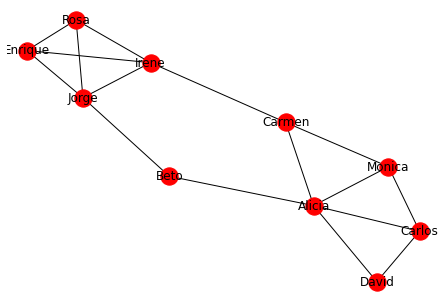

In [14]:
grafica_red(G, "amigos")

# Metricas de grado

## Distribucion de grados

### ACTIVIDAD 3
Cree una funcion grafica_distribucion_grados. Recibe la red G y la variable nombre_dg. Cálcula, imprime y gráfica la distribución de grados. La gráfica la guarda en un archivo png con nombre almacenado en la variable nombre_dg. Devuleve la distribución de grados

In [15]:
def grafica_distribucion_grados(G, nombre_dg):
    dist_grados = nx.degree_histogram(G)
    plt.plot(dist_grados)
    plt.xlabel("grado")
    plt.ylabel("#nodos")
    plt.title("Distribución de Grados")
    plt.savefig(nombre_dg)
    plt.show()

Llama a la función para graficar las distribucion de grados

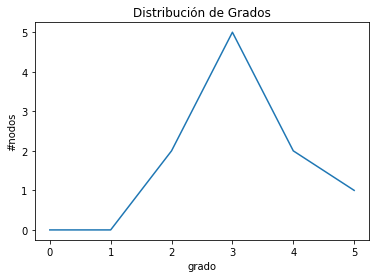

In [16]:
dist_grados = grafica_distribucion_grados(G, "distribucion_amigos")
dist_grados

## Grado promedio de la red

### ACTIVIDAD 4
Cree una función grado_promedio. Recibe la red G y su distribución de grados, imprime y devuelve el valor del grado promedio

In [17]:
def grado_promedio(G):
    grado = 0
    dist_grados = nx.degree_histogram(G)
    for i in range(len(dist_grados)):
        grado += dist_grados[i]*i
    grad_promedio = grado/len(nx.nodes(G))
    print(f"El grado promedio de la red es: {grad_promedio}")

Llama a la información para cálcular el grado promedio

In [18]:
grado_promedio(G)

El grado promedio de la red es: 3.2


## Mapa de calor para el grado nodal

La siguiente funcion que grafica el mapa de calor del grado nodal. Recibe la red G y la variable mapcalor_grado. Gráfica el mapa de calor del grado nodal de la red G. La gráfica la guarda en un archivo png con nombre almacenado en la variable mapcalor_grado

### ACTIVIDAD 5
Modifica el los colores del mapa de color, ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [19]:
def mapa_calor_grado(G, nombre_mcalor_grado):
    degree_map = {node:nx.degree(G, node) for node in G.nodes()}
    #valores máximo y mínimos de grado
    max_degree = max(degree_map.values())
    min_degree = min(degree_map.values())
    #el grado nodal nos da el color de nodo, el cual se mapea con el mapa de color
    colores_nodos = list(degree_map.values())
    #ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html
    mapa_color = plt.get_cmap('bwr')
    #dibujamos la red
    nx.draw(G, cmap=mapa_color, node_color=colores_nodos, with_labels=True)
    #dibujamos la barra de color
    sm = plt.cm.ScalarMappable(cmap=mapa_color,norm=plt.Normalize(vmin = min_degree, vmax=max_degree))
    cbar = plt.colorbar(sm)
    cbar.set_label('Grado')
    plt.savefig(nombre_mcalor_grado + ".png")
    plt.show()
    # la siguiente instruccion limpia la figura, evitando que al graficar varias figuras, estas no se encimen 
    plt.clf()

Llama a la función para gráficar el mapa de calor

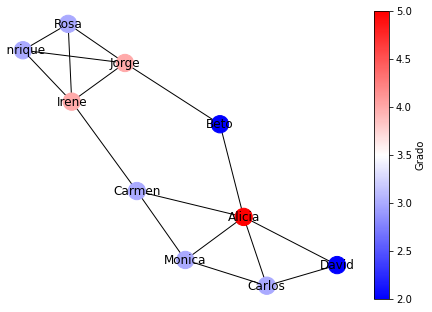

<Figure size 432x288 with 0 Axes>

In [20]:
mapa_calor_grado(G,"mcalor_grado_amigos")

# Modelos de red

## Red completa
Creamos una red completa de 10 nodos

In [21]:
kn = nx.complete_graph(10)

Llama a la función para imprimir información

In [22]:
imprime_informacion(kn)

Información de la red:
- nodos = 10
- enlaces = 45
- diametro = 1
- densidad = 1.0
Name: 
Type: Graph
Number of nodes: 10
Number of edges: 45
Average degree:   9.0000


Llamamos a la función que gráfica la red

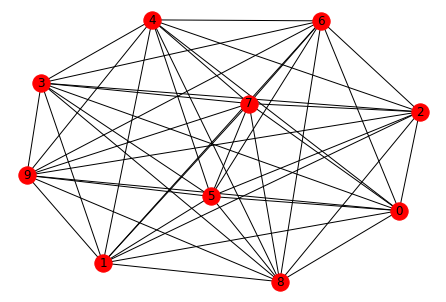

In [23]:
grafica_red(kn, "completa")

Llama a la función para graficar las distribucion de grados

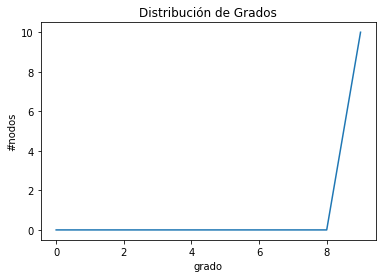

In [24]:
dist_grados = grafica_distribucion_grados(kn, "dist_grados_completa")

Llama a la información para cálcular el grado promedio

In [25]:
grado_promedio(kn)

El grado promedio de la red es: 9.0


Llama a la función para gráficar el mapa de calor

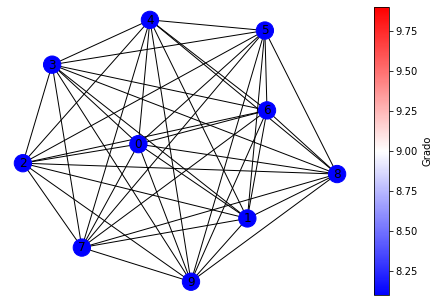

<Figure size 432x288 with 0 Axes>

In [26]:
mapa_calor_grado(kn,"mcalor_grado_completa")

## Red aleatoria Barabasi-Albert
### ACTIVIDAD 6
Creamos una red aleatoria con el modelo Barabasi-Albert y con parámetros n=100 y m=5. Esto quiere decir que la red comienza con m=5 nodos y en cada iteracion se agrega un nuevo nodo que se conecta aletareamente m=5 nodos. El algoritmo termina cuando se tiene un total de n=100 nodos.

https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph

In [27]:
G1 = nx.barabasi_albert_graph(100,5,seed = None)

### ACTIVIDAD 7
Llama a la función para imprimir información de la red Barabasi-Albert

In [28]:
imprime_informacion(G1)

Información de la red:
- nodos = 100
- enlaces = 475
- diametro = 4
- densidad = 0.09595959595959595
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 475
Average degree:   9.5000


### ACTIVIDAD 8
Llamamos a la función que gráfica la red Barabasi-Albert

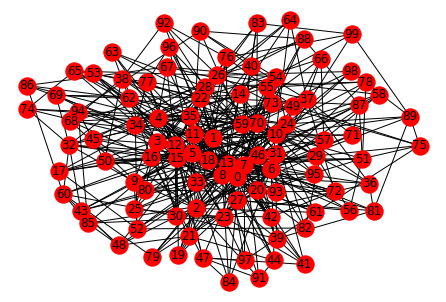

In [29]:
grafica_red(G1, "Red_Barabasi-Albert")

### ACTIVIDAD 9
Llama a la función para graficar las distribucion de grados de la red Barabasi-Albert

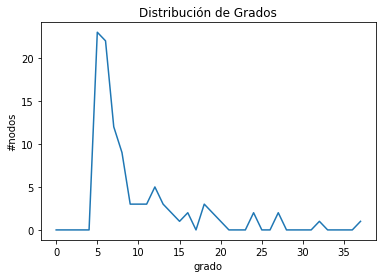

In [30]:
grafica_distribucion_grados(G1,"Graf_distribucion_grado_buciBarabasi-Albert")

### ACTIVIDAD 10
Llama a la información para cálcular el grado promedio de la red Barabasi-Albert

In [31]:
grado_promedio(G1)

El grado promedio de la red es: 9.5


### ACTIVIDAD 11
Llama a la función para gráficar el mapa de calor de la red Barabasi-Albert

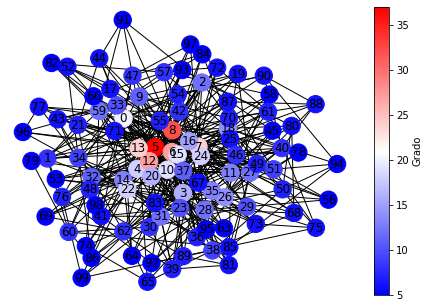

<Figure size 432x288 with 0 Axes>

In [32]:
mapa_calor_grado(G1,"mcalor_grado_Barabasi-Albert")

## Red aleatoria Erdös–Rényi (Gilbert)
### ACTIVIDAD 12
Creamos una red aleatoria con el modelo Erdős–Rényi (implementado con el algoritmo de Gilbert) y con parámteros n=100 y p=0.1. Eso quiere decir que la red tendrá n=100 y cada par de nodos se conectara con probabilidad p=0.1

https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph

In [33]:
G2 = nx.erdos_renyi_graph(100,0.1,seed = None,directed = False)

### ACTIVIDAD 13
Llama a la función para imprimir información de la red aleatoria Erdös-Rényi

In [34]:
imprime_informacion(G2)

Información de la red:
- nodos = 100
- enlaces = 559
- diametro = 4
- densidad = 0.11292929292929293
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 559
Average degree:  11.1800


### ACTIVIDAD 14
Llamamos a la función que gráfica a la red aleatoria Erdös-Rényi

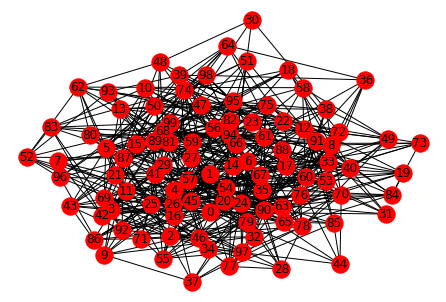

In [35]:
grafica_red(G2,"red_aleatoria_erdos_renyi")

### ACTIVIDAD 15
Llama a la función para graficar las distribucion de grados de la red aleatoria Erdös-Rényi

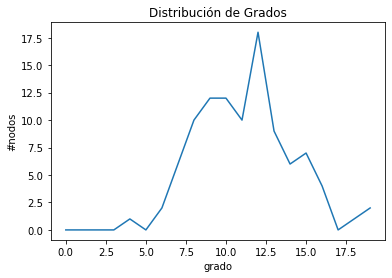

In [51]:
grafica_distribucion_grados(G2,"Graf_distribucion_grado_Erdös-Rényi")

### ACTIVIDAD 16
Llama a la información para cálcular el grado promedio de la red aleatoria Erdös-Rényi

In [52]:
grado_promedio(G2)

El grado promedio de la red es: 11.18


### ACTIVIDAD 17
Llama a la función para gráficar el mapa de calor de la red aleatoria Erdös-Rényi

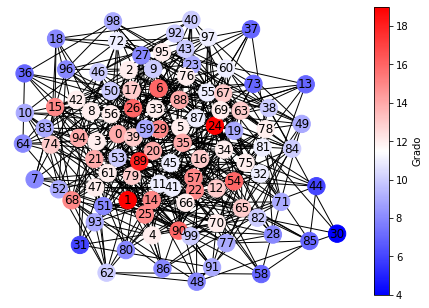

<Figure size 432x288 with 0 Axes>

In [53]:
mapa_calor_grado(G2,"mcalor_grado_Erdös-Rényi")

## Red aleatoria Watts-Strogatz
### ACTIVIDAD 18
Creamos una red aleatoria con el modelo Watts-Strogatz (implementado con el algoritmo de Gilbert) y con parámteros n=100, k=8, p=0.0.5. Eso quiere decir que la red tendrá n=100 inicialmente conectados a si 8 vecinos más cercanos en un anillo. Durante la ejecución del algoritmo, cada enlace se reconectará con probabilidad p=0.01

https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html#networkx.generators.random_graphs.watts_strogatz_graph

In [60]:
G3 = nx.watts_strogatz_graph(100,8,0.05,seed = None)

### ACTIVIDAD 19
Llama a la función para imprimir información de la red aleatoria Watts-Strogatz

In [61]:
imprime_informacion(G3)

Información de la red:
- nodos = 100
- enlaces = 400
- diametro = 7
- densidad = 0.08080808080808081
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 400
Average degree:   8.0000


### ACTIVIDAD 20
Llamamos a la función que gráfica la red aleatoria Watts-Strogatz

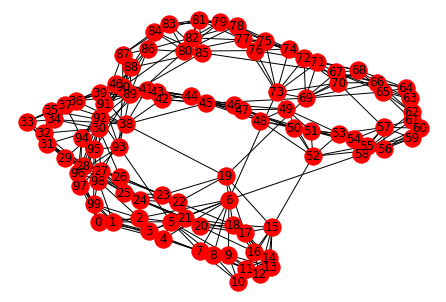

In [62]:
grafica_red(G3,"red_aleatoria_Watts-Strogatz")

### ACTIVIDAD 21
Llama a la función para graficar las distribucion de grados de la red aleatoria Watts-Strogatz

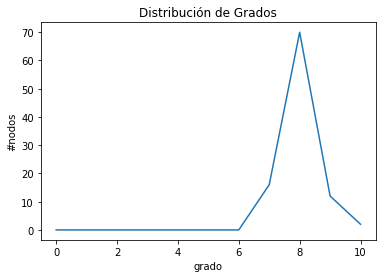

In [63]:
grafica_distribucion_grados(G3,"Graf_distribucion_dgree_Watts-Strogatz")

### ACTIVIDAD 22
Llama a la información para cálcular el grado promedio de la red aleatoria Watts-Strogatz

In [64]:
grado_promedio(G3)

El grado promedio de la red es: 8.0


### ACTIVIDAD 23
Llama a la función para gráficar el mapa de calor de la red aleatoria Watts-Strogatz

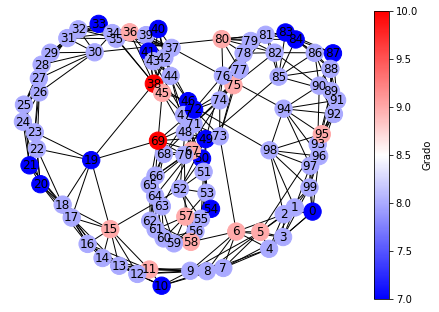

<Figure size 432x288 with 0 Axes>

In [65]:
mapa_calor_grado(G3,"mapa_calor_red_Watts-Strogatz")

# Análisis de la distribucion de grado de la red aleatoria Watts-Strogatz

### ACTIVIDAD 24
Cree 9 redes con el modelo Watts-Strogatz y los parámetros n=100, k=8, tomando los siguientes valores de p = 0, 0.01, 0.03, 0.1, 0.3, 0.5, 0.7, 0.9, 1. Para cada red obtenga su gráfica de distribucion de probabilidad y mapa de calor de grado

In [66]:
n = 100
k = 8
probabilidades = [0, 0.01, 0.03, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
lista_G = []
for i in probabilidades:
    lista_G.append(nx.watts_strogatz_graph(n,k,i,seed = None))

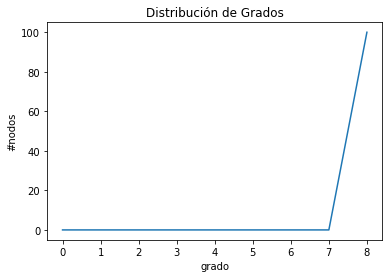

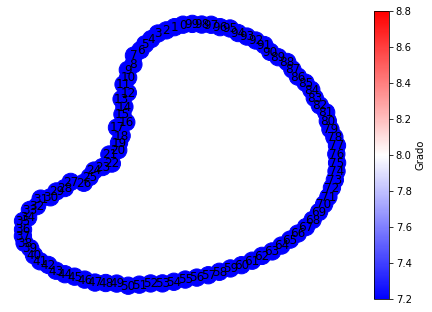

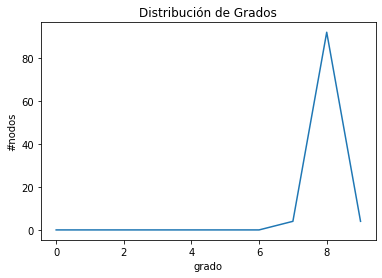

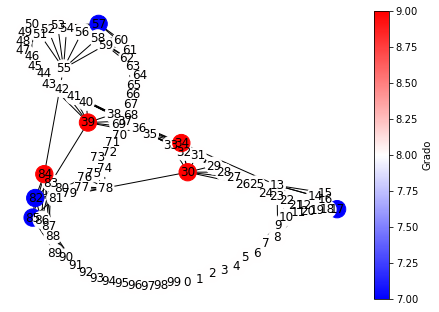

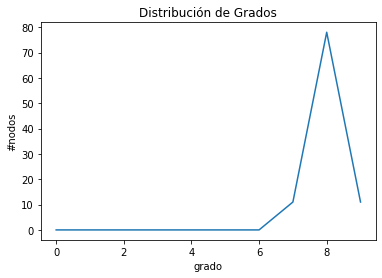

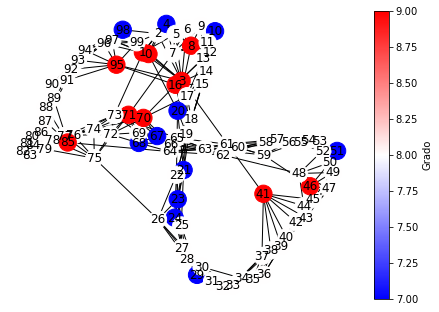

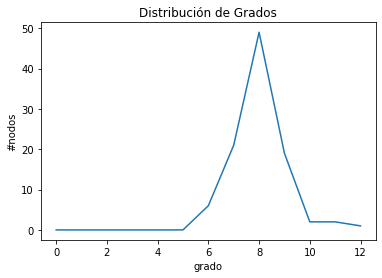

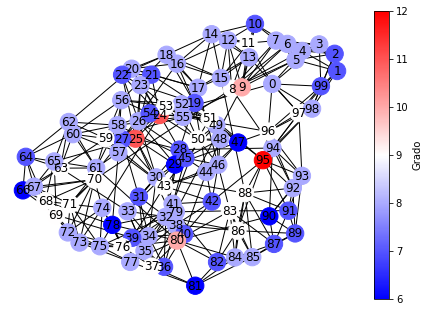

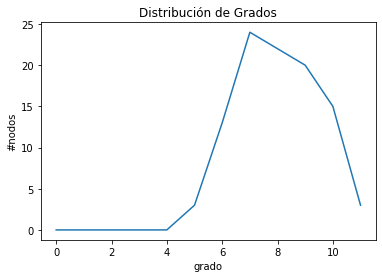

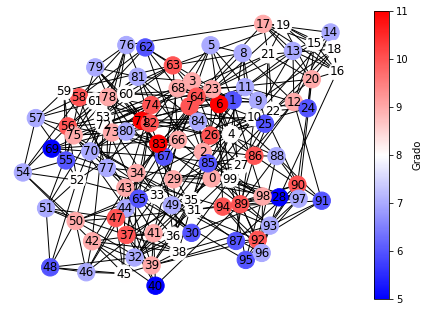

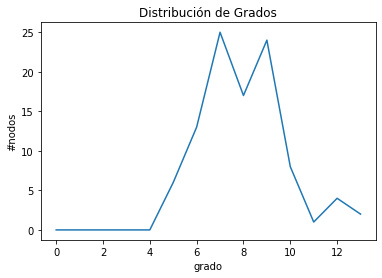

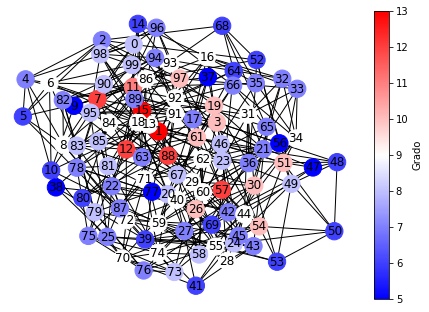

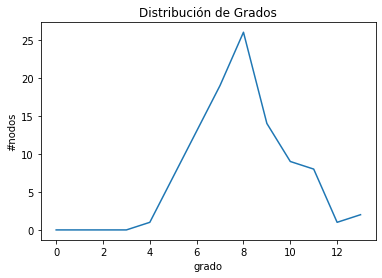

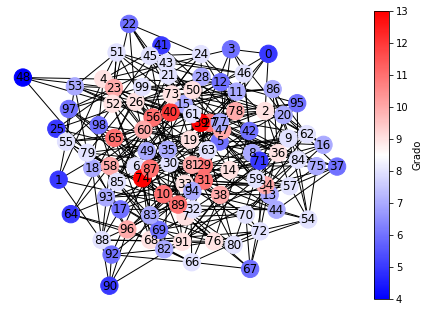

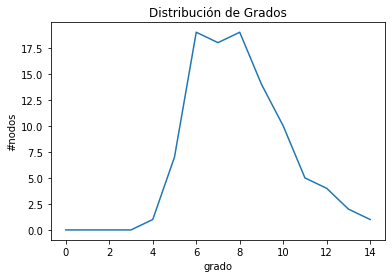

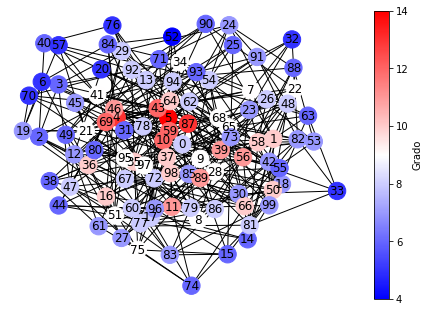

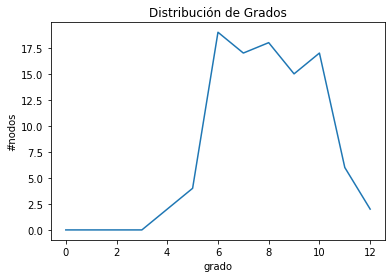

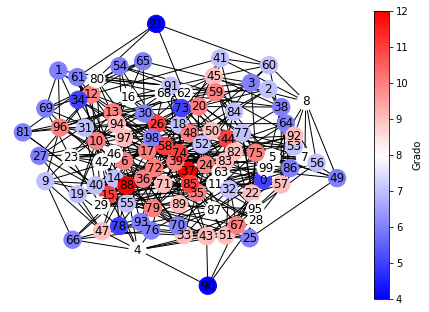

<Figure size 432x288 with 0 Axes>

In [67]:
x = 1
for i in lista_G:
    grafica_distribucion_grados(i,f"grafica_distribución_prbabilidad_WS {x}")
    mapa_calor_grado(i,f"mapa_calor_grado_WS_probabilidad {x}")
    x += 1